In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Load built-in Iris dataset
iris = load_iris()
X = iris.data   # features only (ignore labels)

In [4]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Use the elbow method to find best k
inertia = []  # stores sum of squared distances for each k
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Menna Magdy\AppData\Local\Temp\ipykernel_18364\737206513.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:,0], X_scaled[:,1], cmap='viridis', alpha=0.7)


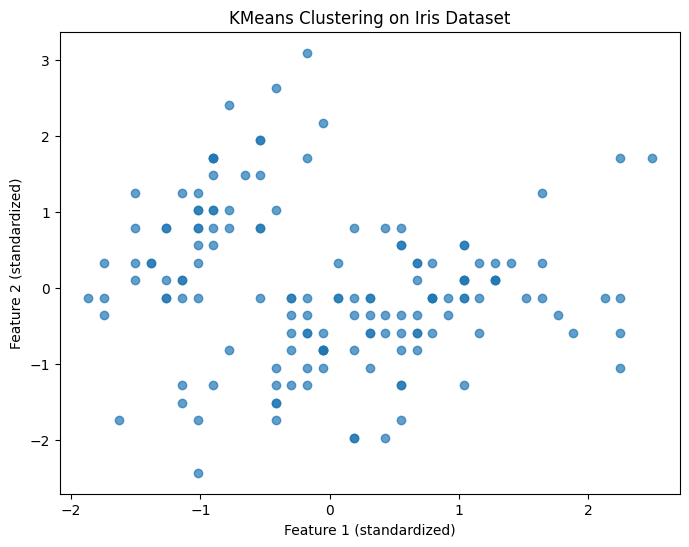

In [6]:
# Plot clusters using first two features
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], cmap='viridis', alpha=0.7)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200)
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.title("KMeans Clustering on Iris Dataset")
plt.show()

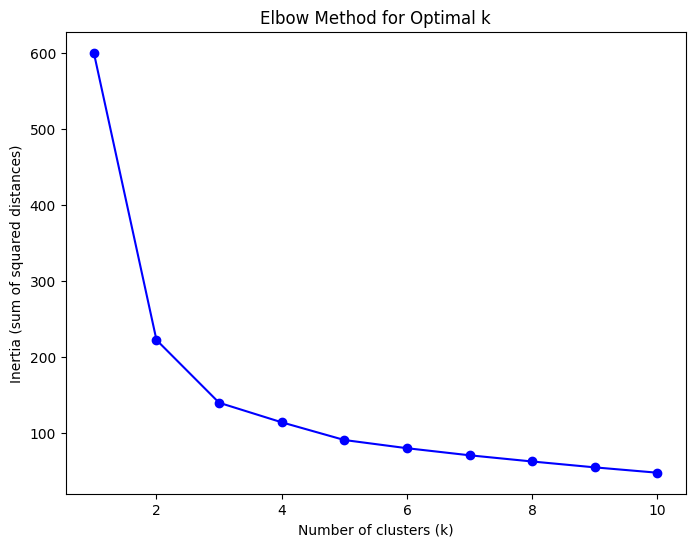

In [7]:
# Plot elbow curve
plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
# Train final KMeans with chosen k (example: k=3 from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


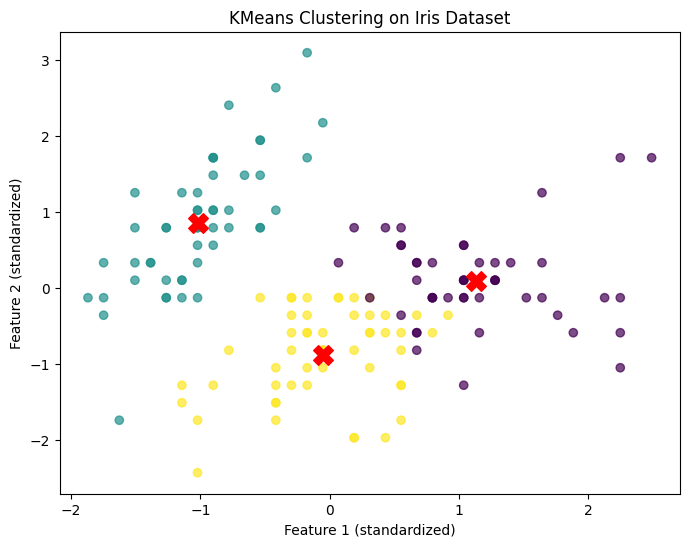

In [10]:
# Plot clusters using first two features
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X')
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.title("KMeans Clustering on Iris Dataset")
plt.show()